<a href="https://colab.research.google.com/github/vagrantxiao/colab/blob/main/mnist_221128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)



# Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


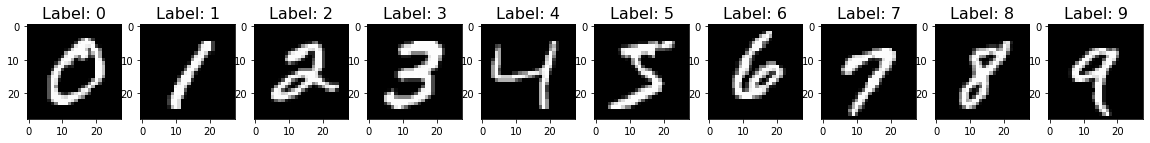

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes,  figsize=(20, 20))

for i in range(0, num_classes):
  sample=x_train[y_train==i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  

In [ ]:
for i in range(10):
  print(x_train[i])


In [ ]:
y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [ ]:
# Normalize Data
x_train = x_train / 255.0
y_test  = y_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully COnnected Neural Network

In [ ]:
model = Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Train

In [ ]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 12ms/step - loss: 0.6162 - accuracy: 0.8224
Epoch 2/10
118/118 [==============================] - 1s 12ms/step - loss: 0.2250 - accuracy: 0.9355
Epoch 3/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1622 - accuracy: 0.9523
Epoch 4/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1265 - accuracy: 0.9631
Epoch 5/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1049 - accuracy: 0.9689
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0866 - accuracy: 0.9749
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0766 - accuracy: 0.9767
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0655 - accuracy: 0.9804
Epoch 9/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0589 - accuracy: 0.9820
Epoch 10/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0512 - accura

Evaluate

In [ ]:
print(x_test.shape)
print(y_test.shape)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

(10000, 784)
(10000, 10)
313/313 [==============================] - 1s 4ms/step - loss: 0.0474 - accuracy: 0.9771
Test Loss: 0.04736986383795738, Test Accuracy: 0.9771000146865845


In [ ]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 3ms/step
[[0.         0.         0.         ... 0.99999994 0.         0.        ]
 [0.         0.         0.99999994 ... 0.         0.         0.        ]
 [0.         0.99999994 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[7 2 1 ... 4 5 6]


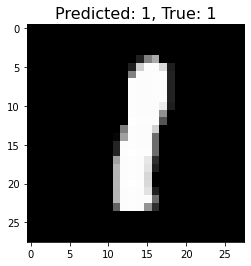

In [ ]:
# single Exmple
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')


Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

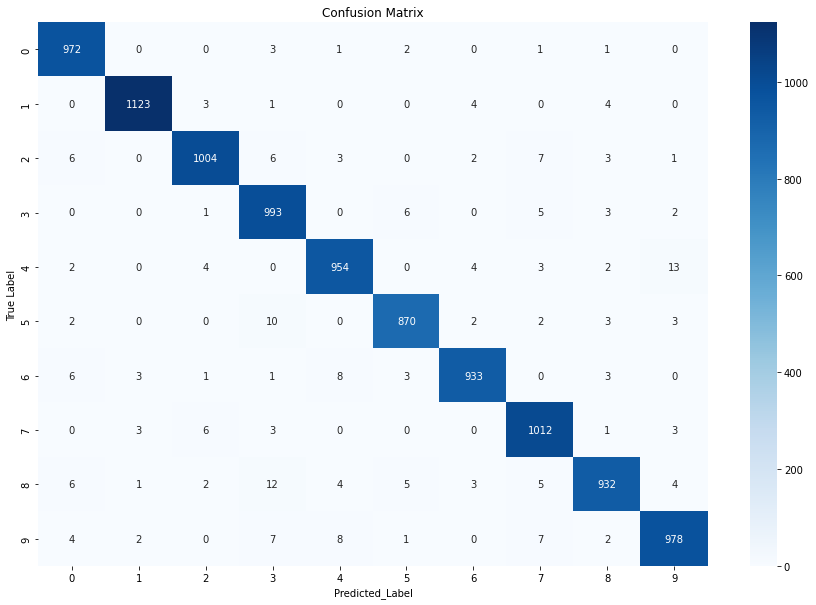

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#plot
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted_Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

Investigate Some Errors

In [ ]:
errors = (y_pred_classes-y_true !=0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]


In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors  = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]



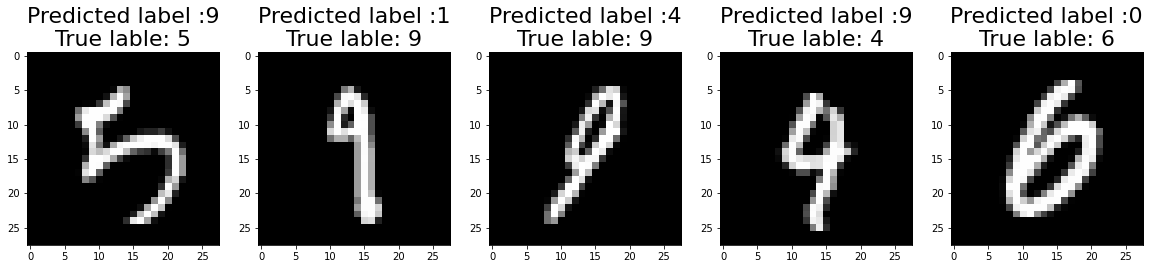

In [ ]:
#Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num , figsize=(20, 20))
for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28, 28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue lable: {}".format(y_p, y_t), fontsize=22)